In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time
import sys

sys.path.insert(1, '/rds/general/user/lr4617/home/4th_Year_Project/Final_Year_Project/')

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE_
from scipy.spatial import distance
from scipy.stats import entropy
from mPE_ultis import integrand, ubble, array_list, permutation
from util import rolling_mean, probability, probability_v2, get_mPE_matrix
from sklearn.cluster import KMeans
sns.color_palette("colorblind")


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

/rds/general/user/lr4617/home/anaconda3/envs/prj_env_conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


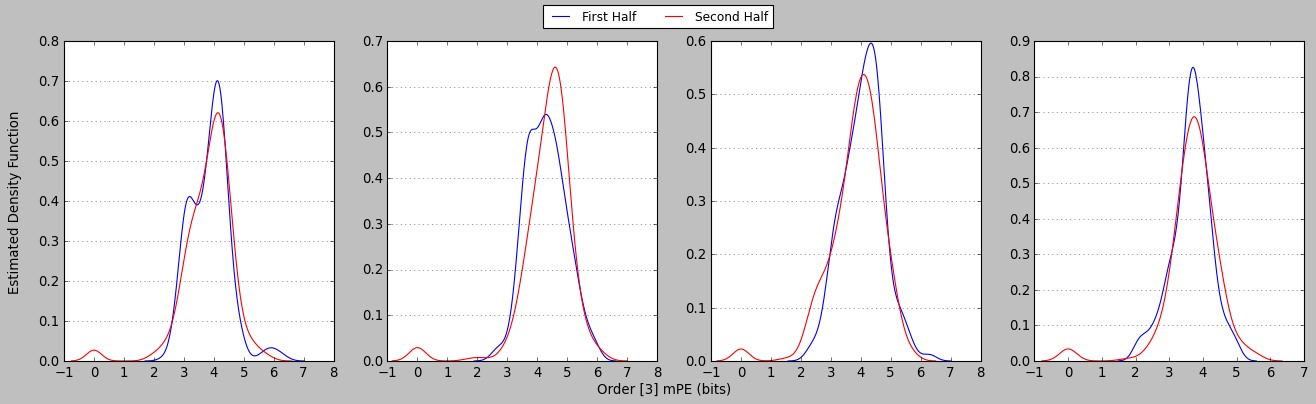

In [73]:
mode = 'normal'
n_PC = 3
eval_step = 'result'

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

###############################################
######## mPE distribution vs time plot ########
###############################################

if mode == 'normal':
    fig, axs = plt.subplots(1,4, figsize=(20, 5))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx].set_xlabel('')
        axs[idx].set_ylabel('')
        axs[idx].grid(axis='y', alpha=0.75)
                
    fig.legend(l, labels=labels, loc="upper center", ncol=2, fontsize='11')
    fig.text(0.5, 0.02, 'Order [3] mPE (bits)', ha='center')
    fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical')
    
    plt.savefig(path_out + 'test_normal.png')
    
    fig.show()

    
else:
    fig, axs = plt.subplots(2,4, figsize=(20, 7))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        if idx <=3:
            idx1 = 0
        else:
            idx = idx -4
            idx1 = 1
            
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx1, idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx1, idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx1, idx].set_xlabel('')
        axs[idx1, idx].set_ylabel('')
        axs[idx1, idx].grid(axis='y', alpha=0.75)
        
    fig.legend(l, labels=labels, loc="upper center", ncol=2, fontsize='11')
    fig.text(0.5, 0.02, 'Order [3] mPE (bits)', ha='center')
    fig.text(0.08, 0.5, 'Estimated Density Function', va='center', rotation='vertical')
    
    plt.savefig(path_out + 'test_drug.png')

    fig.show()

        